#Quiz #8
This notebook is created by Chinchuthakun Worameth as a part of Complex Network (ART.T462) at Tokyo Institute of Technology taught in Fall semester 2021 by Prof. Murata Tsuyoshi. It contains

* An implement of Bredth-First Search (BFS) algorithm
* Demonstration on **Karate club network**

## 1. Bredth-First Search (BFS) [#1]

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class BFS:
  def __init__(self, G, initial):
    self.G = G
    self.initial = initial
    # for BFS
    self.known = [0] * nx.number_of_nodes(G)
    self.dist = [-1] * nx.number_of_nodes(G)
    self.lst = [-1] * nx.number_of_nodes(G)
    self.read_pointer = 0
    self.write_pointer = self.read_pointer + 1
    # for visualization
    self.colors = ['red', 'blue', 'deepskyblue', 'yellow', 'springgreen', 'lightskyblue', 'darkgreen', 'green', 'lightgreen', 'gray', 'lightgray']
    self.color_map = ['black'] * nx.number_of_nodes(G)
  
  def visit(self, v, d):
    self.dist[v] = d
    self.color_map[v] = self.colors[self.dist[v]]
    self.known[v] = 1
  
  def BFS(self):
    self.lst[0] = self.initial
    self.visit(self.initial, 0)
    while self.read_pointer != self.write_pointer:
      current = self.lst[self.read_pointer]
      distance = self.dist[current]
      self.read_pointer += 1
      for v in list(self.G[current]):
        if not self.known[v]:
          self.lst[self.write_pointer] = v
          self.visit(v, distance+1)
          self.write_pointer += 1
  
  def visualize(self):
    print("distance: ", self.dist)
    print("visited: ", self.known)
    print("visit order: ", self.lst)
    plt.figure(figsize=(5, 5))
    nx.draw_spring(self.G, node_size=400, node_color=self.color_map, with_labels=True, font_weight='bold')

## 2. Demonstration on Karate club network (#2)

distance:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2]
visited:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
visit order:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


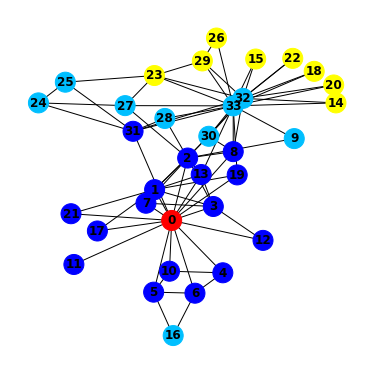

In [3]:
G = nx.karate_club_graph()
demo = BFS(G,0)
demo.BFS()
demo.visualize()

## 3. Why BFS doesn't work with networks with varying edge lengths (#3)

In [4]:
%%capture
!apt update
!apt install imagemagick
!apt install pdf2svg
!apt install texlive texlive-latex-extra
!pip install git+git://github.com/mkrphys/ipython-tikzmagic.git

In [5]:
%load_ext tikzmagic

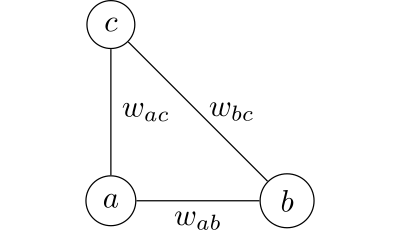

In [6]:
%%tikz -S graph.tikz -f svg
\node[draw, circle, fill=white] (a) at (0,0) {$a$};
\node[draw, circle, fill=white] (b) at (2,0) {$b$};
\node[draw, circle, fill=white] (c) at (0,2) {$c$};
\path[draw] (a) edge node[below] {$w_{ab}$} (b);
\path[draw] (a) edge node[right] {$w_{ac}$} (c);
\path[draw] (b) edge node[right] {$w_{bc}$} (c);

When every edge has equal weight (or no weight), we will never a shorter path to a node $v$ than the first path that we found because the only thing matters is the number of edges take to reach that node. Unfortunately, this assumption does not hold in weighted graphs.

To illustrate this issue, suppose that we start BFS in the graph shown above from node $a$. This implies that the shortest path from node $a$ to node $b$ and $c$ are $w_{ab}$ and $w_{ac}$, respectively. However, if $w_{ab} + w_{bc} < w_{ac}$, the algorithm will generate a wrong solution.